# U.S. Medical Insurance Costs

## File Preview

In [1]:
with open("insurance.csv") as file:
    content = "These are the first 6 lines of the file:\n"
    for i in range(7):
        content += file.readline()

print(content)

These are the first 6 lines of the file:
age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216



# Creating a Dictionary from the file
Here I create a dictionary from the csv file. It will be in the format:
> `dataframe = {id: [...], column_name_1:[...], ... column_name_n:[...]}`

Each value of the dictionary is a list containing the column elements. I got the idea from Pandas Dataframes. <br>
One difference is my `id` list starts from 1. So `id` is of the form:
> `id: [1, 2,... 1337, 1338]`

And `charges` will be of the form:
> `charges: [19, 18,... 21, 61]`

In [2]:
def read_csv_file(file_name, delimiter=","):
    # we first get the field names to make the dictionary
    with open(file_name) as file:
        field_name_str = file.readline().strip()
        field_names = field_name_str.split(delimiter)
        # we get something like ["id", ---column names---]
        field_names.insert(0, "id")
        
        # now we create the dictionary
        # my dataframe format is a dictionary of lists so that column_name : list
        dict = {}
        for column in field_names:
            dict[column] = []
        print(dict)
        
        # go through each line and add the items
        i = 1
        for line_str in file.readlines():
            line = line_str.strip().split(delimiter)
            # to get it to the same format as field_names
            line.insert(0, i)
            
            for num in range(len(field_names)):
                dict[field_names[num]].append(line[num])
                
            i += 1
    
    return dict
    
my_insurance_csv = read_csv_file("insurance.csv")

{'id': [], 'age': [], 'sex': [], 'bmi': [], 'children': [], 'smoker': [], 'region': [], 'charges': []}


## Cleaning up the data
It does help that I know what data types the column entries are. <br>
`age` is converted to a integer list, `sex` is converted to a two-integer list and so on. Only `region` is left as a string since there are too many distinct entries for me to convert it with if statements.

In [3]:
# cleaning up the data
# id is our identifying column
for num in my_insurance_csv["id"]:
    i = num - 1
    # age is an int list
    my_insurance_csv["age"][i] = int(my_insurance_csv["age"][i])
    # let us classify sex to 1 as male and 0 as female
    my_insurance_csv["sex"][i] = 1 if my_insurance_csv["sex"][i] == "male" else 0
    # bmi is a float list
    my_insurance_csv["bmi"][i] = float(my_insurance_csv["bmi"][i])
    # children is an int list
    my_insurance_csv["children"][i] = int(my_insurance_csv["children"][i])
    # smoker will be categorised into 1 as yes and 0 as no
    my_insurance_csv["smoker"][i] = 1 if my_insurance_csv["smoker"][i] == "yes" else 0
    # there isn't any point to changing region since it has too many distinct values
    # charges is a float list
    my_insurance_csv["charges"][i] = float(my_insurance_csv["charges"][i])

## Displaying the data
I have to admit I just used pandas format here. So it just displays the first and last five entries.

In [4]:
def display_dict(dict, width=12):
    line = ""
    for key in dict.keys():
        line += str(key).rjust(width)
    print(line)
    
    for i in range(5):
        line = ""
        for key in dict.keys():
            line += str(dict[key][i]).rjust(width)
        print(line)
    
    line = ""
    for key in dict.keys():
        line += "...".rjust(width)
    print(line)
    
    for i in range(dict["id"][-6], dict["id"][-1]):
        line = ""
        for key in dict.keys():
            line += str(dict[key][i]).rjust(width)
        print(line)
    print("{row} rows x {col} columns.".format(row=dict["id"][-1], col=len(dict.keys()) - 1))
    
display_dict(my_insurance_csv, width = 12)

          id         age         sex         bmi    children      smoker      region     charges
           1          19           0        27.9           0           1   southwest   16884.924
           2          18           1       33.77           1           0   southeast   1725.5523
           3          28           1        33.0           3           0   southeast    4449.462
           4          33           1      22.705           0           0   northwest 21984.47061
           5          32           1       28.88           0           0   northwest   3866.8552
         ...         ...         ...         ...         ...         ...         ...         ...
        1334          50           1       30.97           3           0   northwest  10600.5483
        1335          18           0       31.92           0           0   northeast   2205.9808
        1336          18           0       36.85           0           0   southeast   1629.8335
        1337          21      

# What can we get from the data?
Now that we have a clean dataset, what questions can we give answers to? <br>
1. Comparing Linear Correlation
    - What is the linear correlation of each variables with the charges?
    - What variable has the highest absolute correlation coefficient with charges?
    - What is the relationship between some of the variables?
1. Sex Differences
    - What sex is more likely to have children? <br>
    - Are both sexes uniformly distributed among the clients?
    - What sex pays more on average?
1. Averages and Medians
    - What is the average ages of parents and non-parents?
    - What is the average age of smokers and non-smokers?

## Comparing Linear Correlation
Firstly, I will be finding the linear correlation coeffiecient of all the variables with charges except `region` since it is still made of `strings`. <br>
Here we find out `smoker` has the highest absolute correlation coefficient with `charges` so it seems to be the most important. <br>
We can also compare the variables. Like the relationship between the ages of clients and the number of children they have.

In [5]:
import math

# comparing correlation coeefficients
def correlation(x, y):
    n = len(x)
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_x_2 = 0
    sum_y_2 = 0
    
    for i in range(n):
        x_i = x[i]
        y_i = y[i]
        sum_x += x_i
        sum_y += y_i
        sum_xy += x_i * y_i
        sum_x_2 += x_i ** 2
        sum_y_2 += y_i ** 2
    
    numerator = n * sum_xy - sum_x * sum_y
    denominator = math.sqrt((n * sum_x_2 - sum_x ** 2) * (n * sum_y_2 - sum_y ** 2))
    return round(numerator / denominator, 3)

def correlation_all(keys, y):
    # since correlation is bounded between -1 and 1, I can set the initial value for max_value to 0
    max_value = 0
    for key in keys:
        cor_key = correlation(my_insurance_csv[key], my_insurance_csv[y])
        if abs(cor_key) > max_value:
            max_value = cor_key
            max_key = key
        print("The correlation coefficient betweeen {x} and {y} is {cor}.".format(x=key, y=y, cor=cor_key))
        
    print("The variable with the highest correlation is {x} with a correlation coefficient of {cor}.".format(x=max_key, cor=max_value))

correlation_all(["age", "sex", "bmi", "children", "smoker"], "charges")

The correlation coefficient betweeen age and charges is 0.299.
The correlation coefficient betweeen sex and charges is 0.057.
The correlation coefficient betweeen bmi and charges is 0.198.
The correlation coefficient betweeen children and charges is 0.068.
The correlation coefficient betweeen smoker and charges is 0.787.
The variable with the highest correlation is smoker with a correlation coefficient of 0.787.


In [6]:
print("The correlation coefficient between age and bmi is {cor}.".format(cor=correlation(my_insurance_csv["age"], my_insurance_csv["bmi"])))
print("The correlation coefficient between sex and the number of children had is {cor}.".format(cor=correlation(my_insurance_csv["sex"], my_insurance_csv["children"])))
print("The correlation coefficient between age and the number of children had is {cor}.".format(cor=correlation(my_insurance_csv["age"], my_insurance_csv["children"])))

The correlation coefficient between age and bmi is 0.109.
The correlation coefficient between sex and the number of children had is 0.017.
The correlation coefficient between age and the number of children had is 0.042.


## Sex Differences
I will be comparing sexes and their some of their attributes. <br>
Here we can see that although close, the male clients are more inclined to have children. <br>
Both sexes are more likely to have children than not <br>
Male and female clients are also close to being uniformly distributed.
***
We also find out male clients pay more than female clients on average.

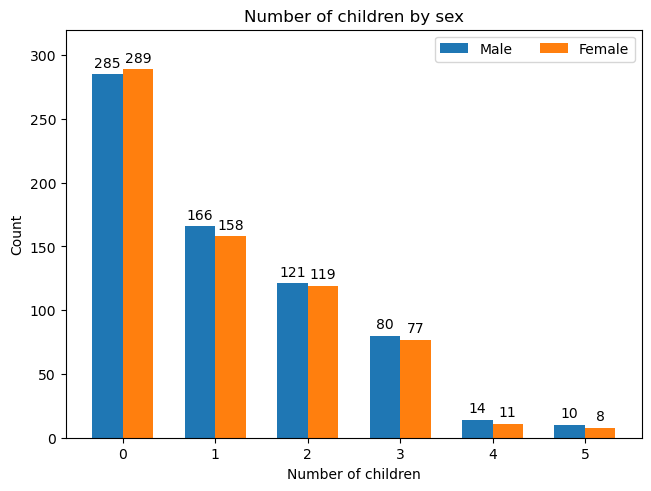

In [7]:
import matplotlib.pyplot as plt

sex = my_insurance_csv["sex"]
children = my_insurance_csv["children"]

count = [i for i in range(6)]
# since the maximum number of children had per person is 5, I will only go from 0 to 5
male = [0, 0, 0, 0, 0, 0]
female = [0, 0, 0, 0, 0, 0]

# so the entry at an index is the number of that sex that have the number of children as the index
for i in range(len(sex)):
    if sex[i] == 1:
        male[children[i]] += 1
    else:
        female[children[i]] += 1

sex_dict = {
    "Male" : male,
    "Female" : female
}

x = list(range(len(count))) # the label locations
width = 0.33  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in sex_dict.items():
    offset = width * multiplier
    rects = ax.bar([i + offset for i in x], measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel("Number of children")
ax.set_title('Number of children by sex')
ax.set_xticks([i + width for i in x], count)
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0, 320)

plt.show()

In [8]:
num_male = 0
num_female = 0 
for i in range(len(male)):
    num_male += male[i]
    num_female += female[i]
    
percent_male = num_male / (num_male + num_female) * 100.0
percent_female = 100.0 - percent_male

print("The ratio of male to female clients is almost evenly distributed with male clients being {male_per}% of clients and females being {fem_per}%.".format(male_per=round(percent_male, 2), fem_per=round(percent_female, 2)))

The ratio of male to female clients is almost evenly distributed with male clients being 50.52% of clients and females being 49.48%.


In [9]:
# What sex pays more on average?
charges = my_insurance_csv["charges"]

male_charges = []
female_charges = []

for i in range(len(charges)):
    if sex[i] == 1:
        male_charges.append(charges[i])
    else:
        female_charges.append(charges[i])

avg_male_charges = round(sum(male_charges) / num_male, 2)
avg_fem_charges = round(sum(female_charges) / num_female, 2)

print("The average charges for male clients is {avg_male} while the average charges for female clients is {avg_fem}.".format(avg_male=avg_male_charges, avg_fem=avg_fem_charges))

The average charges for male clients is 13956.75 while the average charges for female clients is 12569.58.


## Averages and Medians
I will be comparing the averages of some attributes like `age`. <br>
The average ages of parents and non-parents are close surprsingly with their values being 40 and 38 years. This can be explained by the fact that most parents are in the 30 - 50 range while the non-parents have bumps in the edges. Their median ages are also similar with values of 40 and 36 years respectively.
***
The average ages of smokers and non-smokers are equal, with both being 39 years. Their median ages are 38.5 and 40 years respectively.

In [10]:
# what is the average and median age of parents and non_parents
ages = my_insurance_csv["age"]

parent_ages = []
non_parent_ages = []

for i in range(len(ages)):
    if children[i] == 0:
        non_parent_ages.append(ages[i])
    else:
        parent_ages.append(ages[i])

num_parents = len(parent_ages)
sum_parents = sum(parent_ages)
num_non_parents = len(non_parent_ages)
sum_non_parents = sum(non_parent_ages)

def median(data):
    n = len(data)
    data_sorted = sorted(data)
    if n % 2 == 0:
        return (data_sorted[int(n / 2)] + data_sorted[int((n / 2) + 1)]) / 2
    else:
        return data_sorted[int((n + 1) / 2)]

average_parent = sum_parents / num_parents
average_non_parent = sum_non_parents / num_non_parents
median_parent = median(parent_ages)
median_non_parent = median(non_parent_ages)

print("The average age of parents is {avg_p} years while the average age of non-parents is {avg_np} years.".format(avg_p=round(average_parent), avg_np=round(average_non_parent)))
print("The median age of parents is {med_p} years while the median age of non-parents is {med_np} years.".format(med_p=median_parent, med_np=median_non_parent))

The average age of parents is 40 years while the average age of non-parents is 38 years.
The median age of parents is 40.0 years while the median age of non-parents is 36.0 years.


In [11]:
# what is the average and median age of smokers?
smokers = my_insurance_csv["smoker"]

smoker_ages = []
non_smoker_ages = []

for i in range(len(ages)):
    if smokers[i] == 0:
        non_smoker_ages.append(ages[i])
    else:
        smoker_ages.append(ages[i])

num_smokers = len(smoker_ages)
sum_smokers = sum(smoker_ages)
num_non_smokers = len(non_smoker_ages)
sum_non_smokers = sum(non_smoker_ages)

average_smoker = sum_smokers / num_smokers
average_non_smoker = sum_non_smokers / num_non_smokers
median_smoker = median(smoker_ages)
median_non_smoker = median(non_smoker_ages)

print("The average age of smokers is {avg_s} years while the average age of non-smokers is {avg_ns} years.".format(avg_s=round(average_smoker), avg_ns=round(average_non_smoker)))
print("The median age of smokers is {med_s} years while the median age of non-smokers is {med_ns} years.".format(med_s=median_smoker, med_ns=median_non_smoker))

The average age of smokers is 39 years while the average age of non-smokers is 39 years.
The median age of smokers is 38.5 years while the median age of non-smokers is 40.0 years.
